In [1]:
## Importing Necessary libraries
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras import utils

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() ## Uploading dataset

In [3]:
## Checking shape of the dataset
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

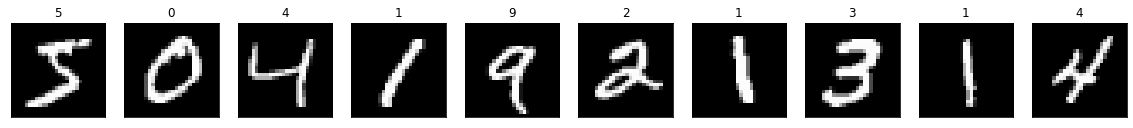

In [8]:
fig,axes = plt.subplots(ncols = 10,sharex = False,sharey = True,
                        figsize=(20,4))

for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i],cmap = 'gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    
plt.show()    

In [9]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [10]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [11]:
model  = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(10,activation = 'sigmoid')) ## Hidden Layer1
model.add(Dense(5,activation = 'sigmoid')) ## Hidden Layer2
model.add(Dense(10,activation = 'softmax')) ## Output Layer


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


Here None is showing because we have not given any batch size, keras by default take 32 as batch size.Batch sizes 
 alwyas in power of 2.

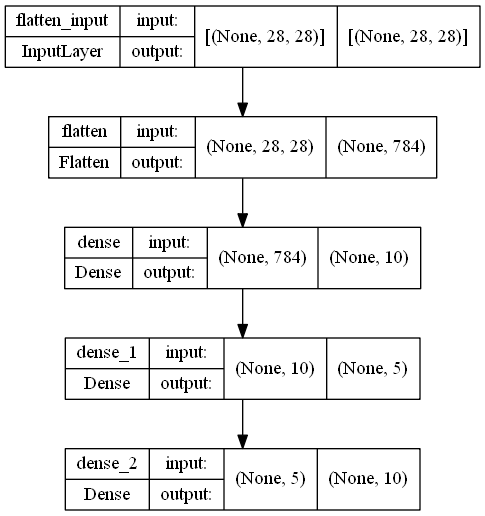

In [13]:
utils.plot_model(model,show_shapes  = True)

In [14]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['acc']
             )

In [20]:
history = model.fit(X_train,y_train,epochs =10 ,validation_data = (X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4486 - acc: 0.8758 - val_loss: 0.4358 - val_acc: 0.8864
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4520 - acc: 0.8740 - val_loss: 0.4351 - val_acc: 0.8791
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4475 - acc: 0.8768 - val_loss: 0.4869 - val_acc: 0.8502
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4564 - acc: 0.8733 - val_loss: 0.4534 - val_acc: 0.8748
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4543 - acc: 0.8757 - val_loss: 0.4463 - val_acc: 0.8745
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4533 - acc: 0.8751 - val_loss: 0.4240 - val_acc: 0.8839
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4429 - acc: 0.8788 - val_loss: 0.4232 - val_acc: 0.8855
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

We have 60000 data ponits in mnist and by default keras take 32 batch size, so 60000/32 =  1875 points per epoch.
epochs = 1 fwd propogation + 1 backward propogation

In [21]:
model.save('mnist_model.h5')

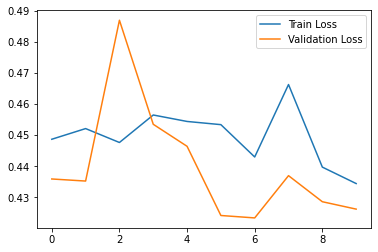

In [22]:
plt.plot(history.history['loss'],label ='Train Loss' )
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.legend()

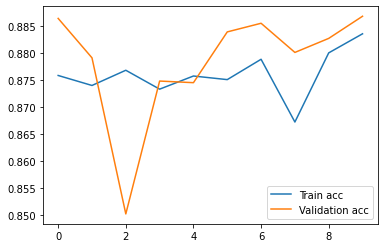

In [23]:
plt.plot(history.history['acc'],label ='Train acc' )
plt.plot(history.history['val_acc'],label = 'Validation acc')
plt.legend()

In [24]:
import keras.models 
model = keras.models.load_model('mnist_model.h5')

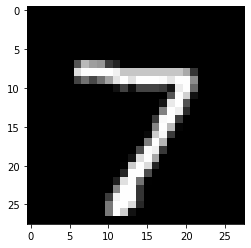

In [25]:
plt.imshow(X_test[0],cmap = 'gray')

In [26]:
X_test[0].shape

(28, 28)

In [27]:
import numpy as np
x = np.reshape(X_test[0],(1,28,28))
np.argmax(model.predict(x))

7

In above step, we are testing for one data point through our model, so in input layer we have to mention it, here we are 
not providing any batch, only one data point is given so ,it has given (1,28,28)

In [28]:
model.predict(x)

array([[3.7223639e-03, 1.8373566e-09, 1.0863283e-03, 2.4013412e-03,
        1.7008046e-03, 1.4786278e-03, 4.6643196e-05, 9.8475075e-01,
        1.1184922e-05, 4.8018279e-03]], dtype=float32)